In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from matplotlib.pyplot import figure
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox
import itertools
import math
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import statsmodels.api as sm
from sklearn import neighbors
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usedcar-data/CarDetails_DataDescription.docx
/kaggle/input/usedcar-data/UserCarData.csv


In [2]:
usedcars_df = pd.DataFrame()
usedcars_df = pd.read_csv("/kaggle/input/usedcar-data/UserCarData.csv")
usedcars_df

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,Hyundai,2013,320000,110000,Central,Texas,Plano,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N
7902,8125,Hyundai,2007,135000,119000,Central,Texas,Port Arthur,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N
7903,8126,Maruti,2009,382000,120000,Central,Texas,Port Arthur,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N
7904,8127,Tata,2013,290000,25000,East,Massachusetts,Lunenburg,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N


In [3]:
# Fetching DataFrame details like dimension etc,.
usedcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [4]:
usedcars_df.describe()

,Sales_ID,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,4070.106248,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,5.416393
std,2345.770159,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,0.959208
min,1.000000,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2037.250000,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,4076.500000,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,6102.000000,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,5.000000
max,8128.000000,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


##### No.of unique values in each feature

In [5]:
col_list = list(usedcars_df.columns)
for col in col_list:
    print('{} :'.format(col), usedcars_df[col].nunique()) 

Sales_ID : 7906
name : 31
year : 27
selling_price : 670
km_driven : 898
Region : 4
State or Province : 49
City : 1310
fuel : 4
seller_type : 3
transmission : 2
owner : 5
mileage : 381
engine : 121
max_power : 318
torque : 441
seats : 9
sold : 2


## Data Cleaning

#### Identifying Features with more than 40% Missing Values

In [6]:
usedcars_missing_df = pd.concat([(usedcars_df.isnull().sum()*100/usedcars_df.isnull().count()).sort_values(ascending=False)], axis=1, keys=["percentage"])
usedcars_missing_df[usedcars_missing_df["percentage"] > 10]

,percentage


No Missing Values

##### Creating Numeric and Non Numeric feature lists

In [7]:
print(usedcars_df.select_dtypes(['float64', 'int64']).columns)
print(usedcars_df.select_dtypes('object').columns)

# target Feature is 'selling_price'

Index(['Sales_ID', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')
Index(['name', 'Region', 'State or Province', 'City', 'fuel', 'seller_type',
       'transmission', 'owner', 'torque', 'sold'],
      dtype='object')


In [8]:
usedcars_col_list = ['selling_price', 'mileage', 'engine', 'max_power']

The Torque variable is a string and has 2 metrics, force with multiple units like Nm & kgm and rpm (constant & range) in a single variable. to consider this variable it involves data manipulation like converting Nm to Kgm & vice versa, Convert RPM range value to constant and data standardization. Considering all the above transformation changes, we will be dropping the Torque Variable.

Similarly the State or Province & City fields are also not necessary for predicting the selling price.

In [9]:
usedcars_df = usedcars_df.drop(['km_driven', 'Region', 'name', 'torque', 'State or Province', 'City','seller_type', 'sold', 'transmission','owner','fuel'],axis=1)

In [10]:
usedcars_cat_list = ['year', 'seats']

In [11]:
# Identifying Zero values
for col in usedcars_col_list:
    print('{}: '.format(col),usedcars_df[usedcars_df[col] == 0].year.count())
    #.replace(0,np.nan,inplace=True)
   # diabetes_df[col].fillna(diabetes_df[col].median(),inplace=True)

selling_price:  0
mileage:  17
engine:  0
max_power:  0


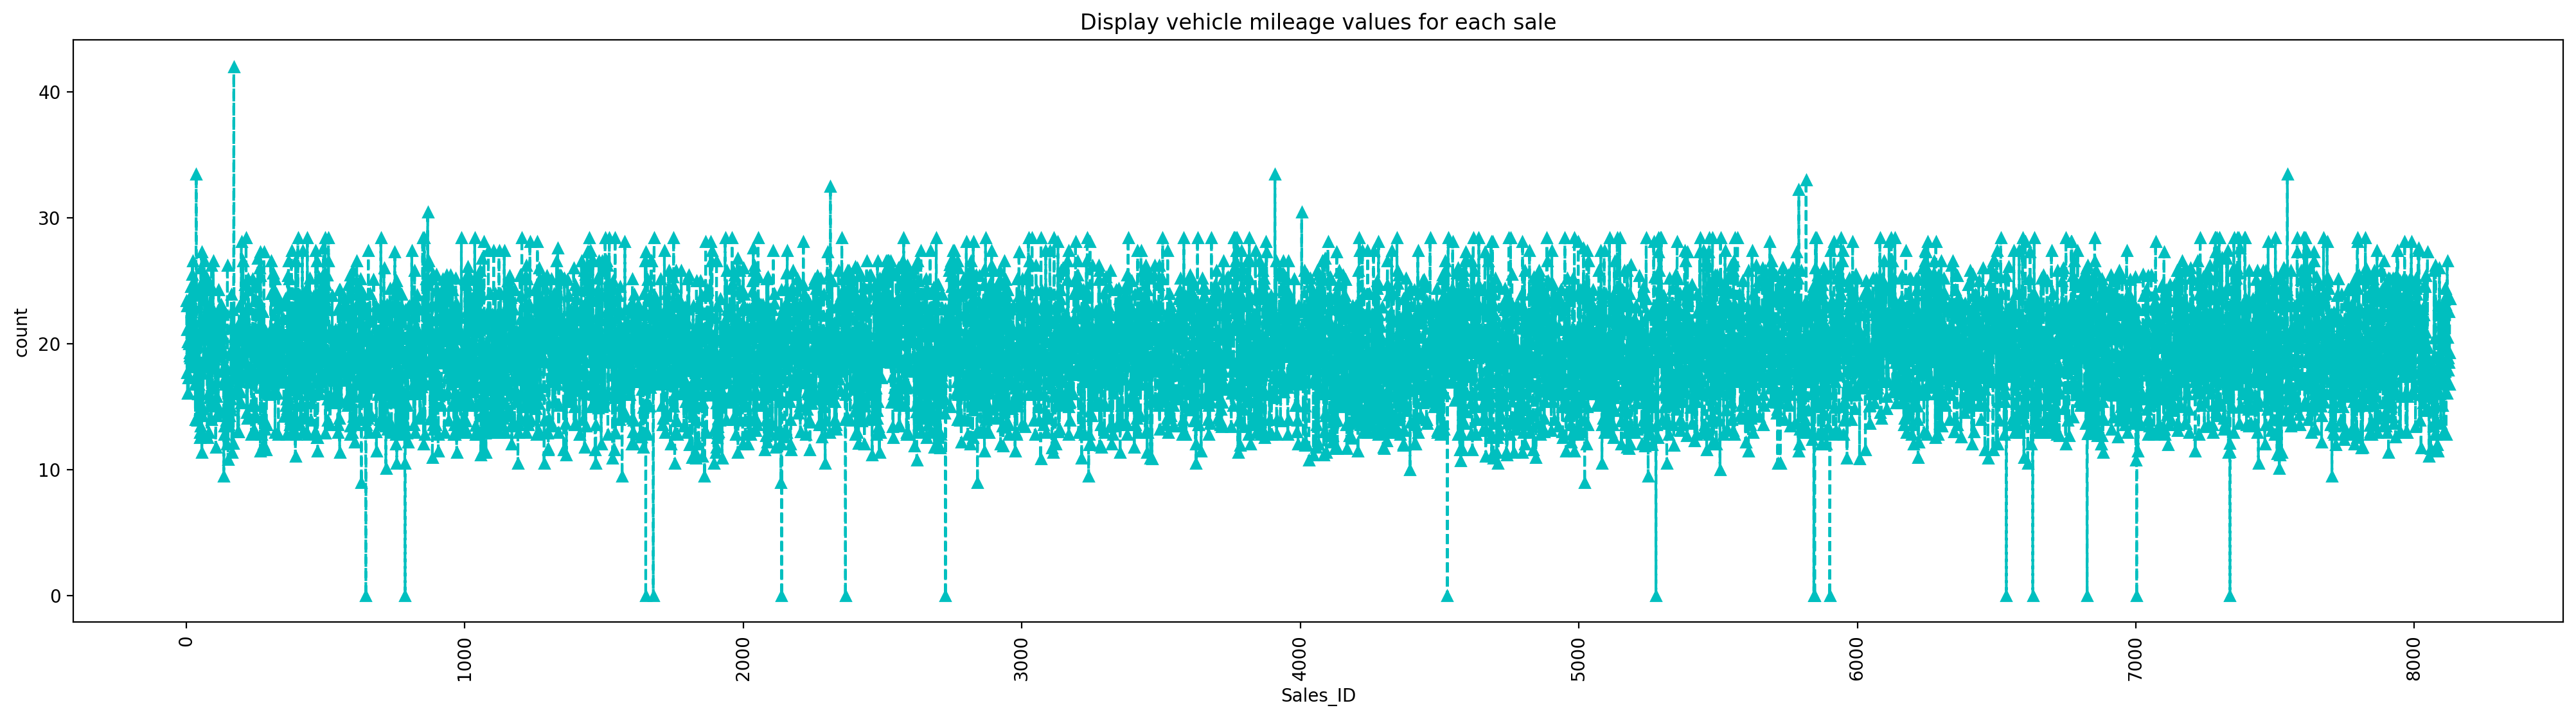

In [12]:
# Used Car mileage by Sale ID

figure(figsize=(25,6), dpi=200)
plt.plot(usedcars_df['Sales_ID'], usedcars_df['mileage'], 'c^--')
plt.title('Display vehicle mileage values for each sale')
plt.ylabel('count')
plt.xlabel('Sales_ID')
plt.xticks(rotation=90)
plt.show()

Looking at the above plot and the metrics, there are few samples with mileage as zero values. 

### Identifying Outliers


In [13]:
# Replacing 0 values with median as log(0) is infinite which cannot be plotted later after log transformation
for col in usedcars_col_list:
    usedcars_df[col].replace(0,np.nan,inplace=True)
    usedcars_df[col].fillna(usedcars_df[col].median(),inplace=True)

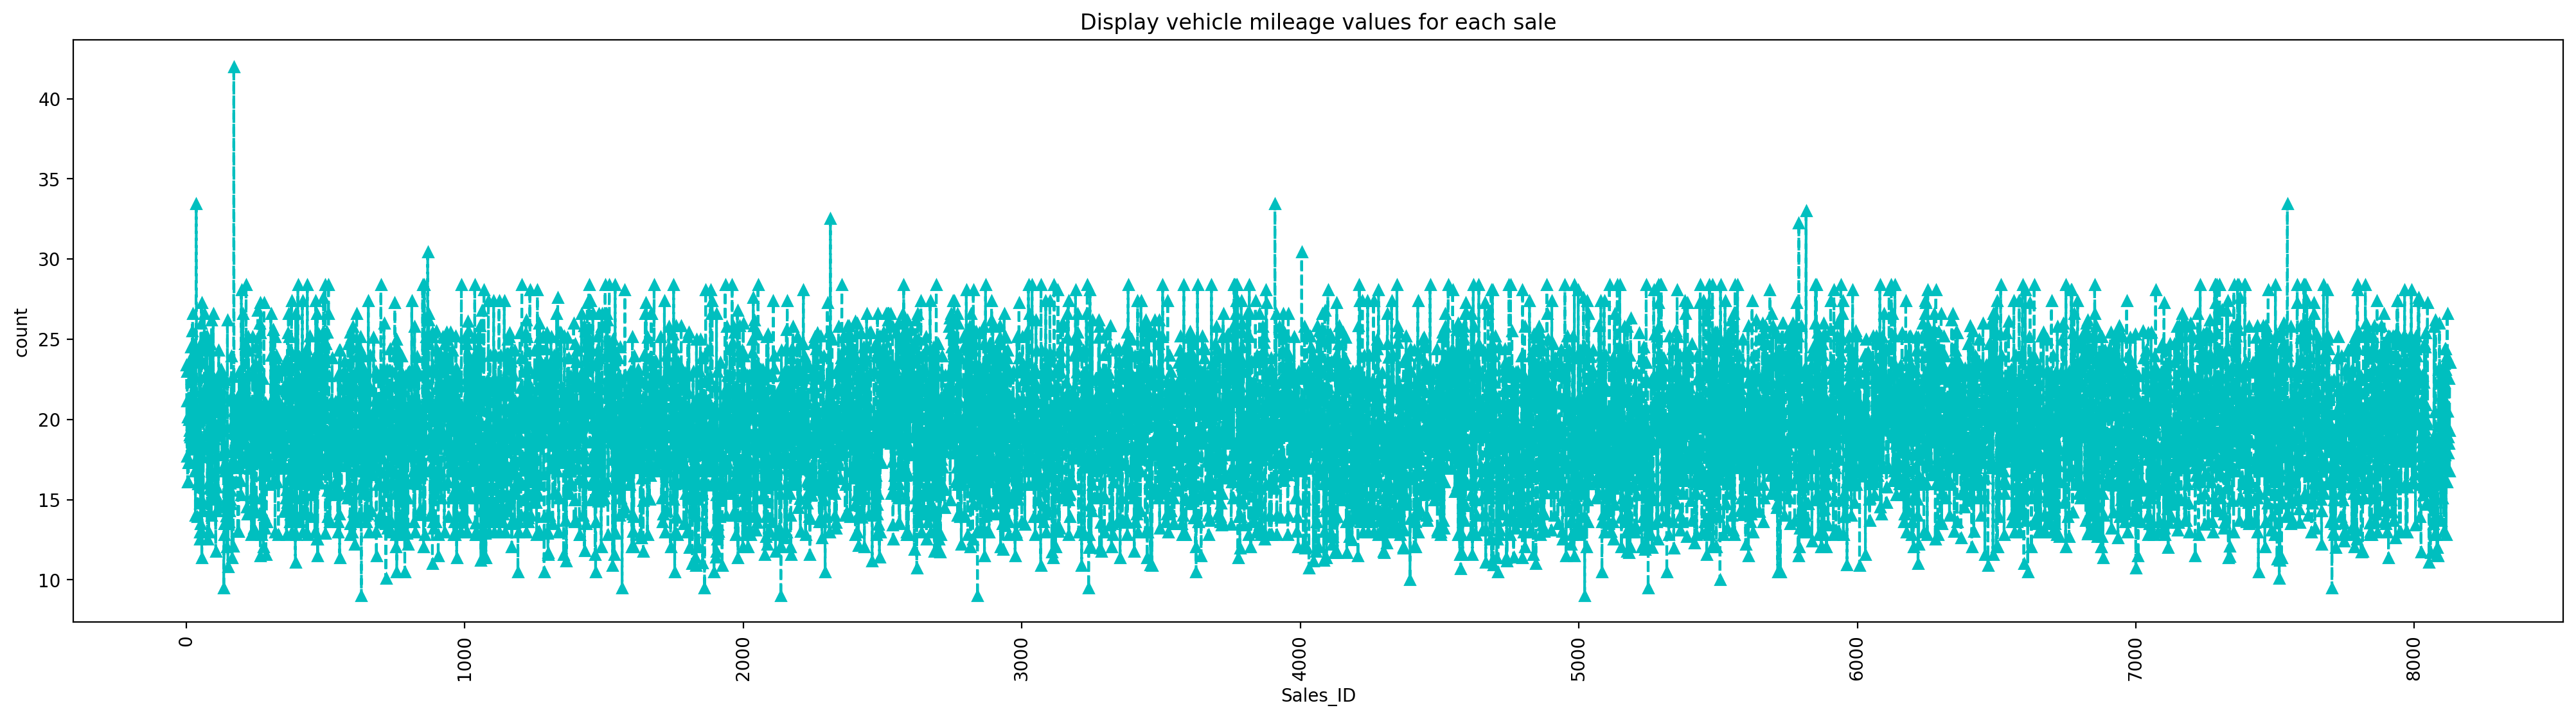

In [14]:
# Used Car mileage by Sale ID

figure(figsize=(25,6), dpi=200)
plt.plot(usedcars_df['Sales_ID'], usedcars_df['mileage'], 'c^--')
plt.title('Display vehicle mileage values for each sale')
plt.ylabel('count')
plt.xlabel('Sales_ID')
plt.xticks(rotation=90)
plt.show()

In [15]:
# Dropping Sales_ID which is not necessary

usedcars_df = usedcars_df.drop(['Sales_ID'],axis=1)

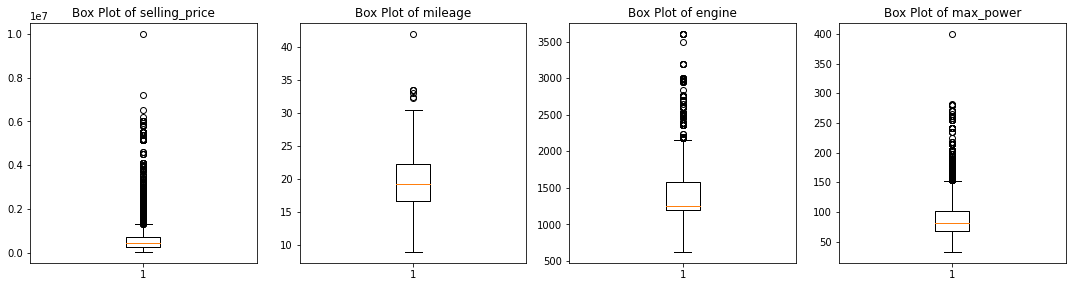

In [16]:
# Checking if there are any outliers using Box Plot for continuous variables

fig = plt.figure(figsize = (15,15))

for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list),4,i+1)
    plt.boxplot(usedcars_df[col])
    plt.title("Box Plot of {}".format(col))
fig.tight_layout()
plt.show()

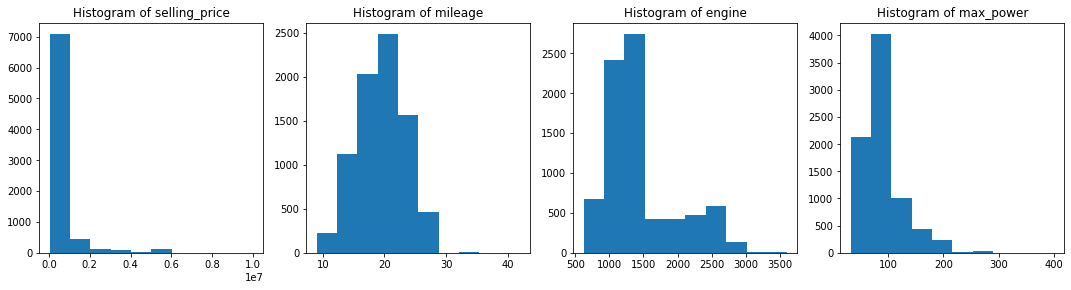

In [17]:
# Checking Normality for continuous variables
fig = plt.figure(figsize = (15,15))

for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list),4,i+1)
    plt.hist(usedcars_df[col])
    plt.title("Histogram of {}".format(col))
fig.tight_layout()
plt.show()

None of the continuous variables are normally distributed

In [18]:
# Statistical methods to detect outliers
# Z-Score method 
from scipy.stats import zscore
for col in usedcars_col_list:
    z_scores = zscore(usedcars_df[col])
    print(col)
    threshold = 3
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    print(40*"--")

selling_price
The score threshold is: 3
The indices of the outliers:
(array([ 126,  127,  128,  129,  130,  131,  132,  133,  139,  142,  164,
        278,  358,  359,  361,  371,  372,  396,  397,  399,  409,  410,
        628,  629,  631,  641,  642, 1026, 1040, 1047, 1048, 1050, 1060,
       1061, 1066, 1067, 1069, 1079, 1080, 1085, 1086, 1088, 1098, 1099,
       1104, 1105, 1107, 1117, 1118, 1482, 1513, 1514, 1515, 1516, 1660,
       1661, 1663, 1673, 1674, 1767, 1774, 1776, 1780, 1803, 1804, 1805,
       1806, 1817, 1818, 1920, 1934, 2545, 2546, 2548, 2558, 2559, 2578,
       2579, 2581, 2591, 2592, 2618, 2740, 2846, 2983, 2984, 2986, 2996,
       2997, 3136, 3137, 3138, 3139, 3140, 3141, 3148, 3151, 3304, 3305,
       3307, 3317, 3318, 3408, 3409, 3411, 3421, 3422, 3716, 3717, 3719,
       3729, 3730, 3960, 3978, 4093, 4094, 4096, 4106, 4107, 4112, 4113,
       4115, 4125, 4126, 4132, 4133, 4135, 4145, 4146, 4196, 4197, 4199,
       4209, 4210, 4238, 4288, 4289, 4291, 4301, 4302,

In [19]:
# Tukey's Method (Values outside the threshold of 1.5)
for col in usedcars_col_list:
    print(col)
    q75, q25 = np.percentile(usedcars_df[col], [75 ,25])
    iqr = q75 - q25
    threshold = 2
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((usedcars_df[col] > max_val) 
                      | (usedcars_df[col] < min_val))[0]))
    ))
    print(40*"--")

selling_price
The score threshold is: 2
Number of outliers is: 517
--------------------------------------------------------------------------------
mileage
The score threshold is: 2
Number of outliers is: 4
--------------------------------------------------------------------------------
engine
The score threshold is: 2
Number of outliers is: 781
--------------------------------------------------------------------------------
max_power
The score threshold is: 2
Number of outliers is: 451
--------------------------------------------------------------------------------


### Log Transforming Outliers


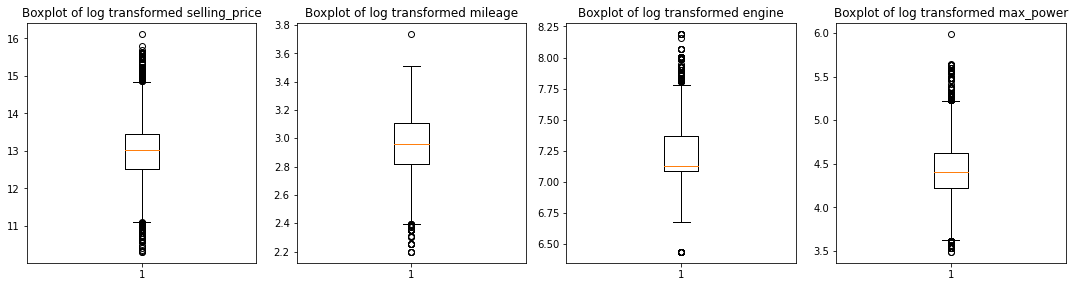

In [20]:
# Box PLot of log transformed data
fig = plt.figure(figsize=(15,15))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    plt.boxplot(np.log(usedcars_df[col]))
    plt.title("Boxplot of log transformed {}".format(col))
fig.tight_layout()
plt.show()

In [21]:
# Take the log of the variables and calculate the quartiles accordingly.
for col in usedcars_col_list:
    print(col)
    q75, q25 = np.percentile(np.log(usedcars_df[col]), [75 ,25])
    iqr = q75 - q25

    for threshold in np.arange(1,5,0.5):
        min_val = q25 - (iqr*threshold)
        max_val = q75 + (iqr*threshold)
        print("The score threshold is: {}".format(threshold))
        print("Number of outliers is: {}".format(
            len((np.where((np.log(usedcars_df[col]) > max_val) 
                      | (np.log(usedcars_df[col]) < min_val))[0]))
        ))
    print(40*("--"))

selling_price
The score threshold is: 1.0
Number of outliers is: 772
The score threshold is: 1.5
Number of outliers is: 377
The score threshold is: 2.0
Number of outliers is: 139
The score threshold is: 2.5
Number of outliers is: 1
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
--------------------------------------------------------------------------------
mileage
The score threshold is: 1.0
Number of outliers is: 262
The score threshold is: 1.5
Number of outliers is: 48
The score threshold is: 2.0
Number of outliers is: 5
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0
----------------------------------------

### Univariant Analysis

In [22]:
# Getting discriptive statistics
usedcars_df.describe(include='all')

,year,selling_price,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,19.461425,1458.708829,91.587374,5.416393
std,3.863695,8.135827e+05,3.934295,503.893057,35.747216,0.959208
min,1994.000000,2.999900e+04,9.000000,624.000000,32.800000,2.000000
25%,2012.000000,2.700000e+05,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,19.330000,1248.000000,82.000000,5.000000
75%,2017.000000,6.900000e+05,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,42.000000,3604.000000,400.000000,14.000000


#### Univariate visualization of continuous variables

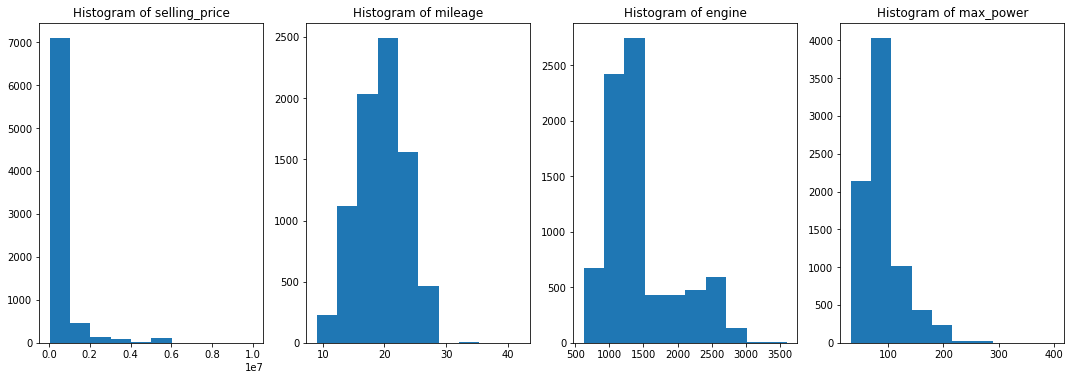

In [23]:
# Histogram plot of Original data
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    plt.hist(usedcars_df[col])
    plt.title("Histogram of {}".format(col))
fig.tight_layout()
plt.show()

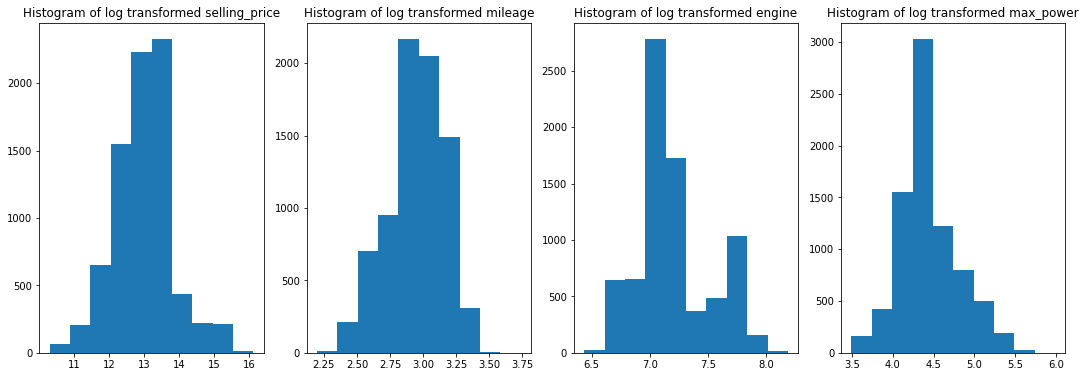

In [24]:
# Histogram of log transformed data

fig = plt.figure(figsize=(15,20))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    plt.hist(np.log(usedcars_df[col]))
    plt.title("Histogram of log transformed {}".format(col))
fig.tight_layout()
plt.show()

The Log Transformed Data look more closely to normally distributed.

In [25]:
# Creating Log transformed dataset
log_usedcars_df = pd.DataFrame()
for col in usedcars_col_list:
    log_usedcars_df[col]=np.log(usedcars_df[col])

In [26]:
# replace log transformed selling price variable with original selling_price
log_usedcars_df = log_usedcars_df.drop(['selling_price'], axis=1)

# Adding Target Variable and other non nopn transformed data to log_diabetes_df
log_usedcars_df["selling_price"]=usedcars_df["selling_price"]



#### Univariate Visualization of categorical variables

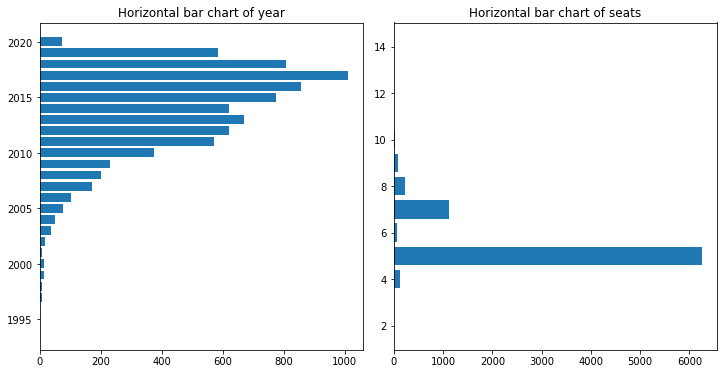

In [27]:
# Bar chart of categorical variables

fig = plt.figure(figsize=(20,10))
for i, col in enumerate(usedcars_cat_list):
    plt.subplot(len(usedcars_cat_list), 4, i+1)
    plt.barh(usedcars_df.groupby(col)[col].count().index, usedcars_df.groupby(col)[col].count())
    plt.title("Horizontal bar chart of {}".format(col))
fig.tight_layout()
plt.show()

Among all categorical variables charts demonstrated above, the most important and commonly used variable for predicting the selling price are State, Fuel, seller_type, Transmission & owner. (data Imbalance) The observation counts for all these variables are not same across different categories. Example: the Transmission Bar Chart, the sample of Manual Transmission vehicles are higher than the automatic.

### Bivariate analysis of two continuous variables

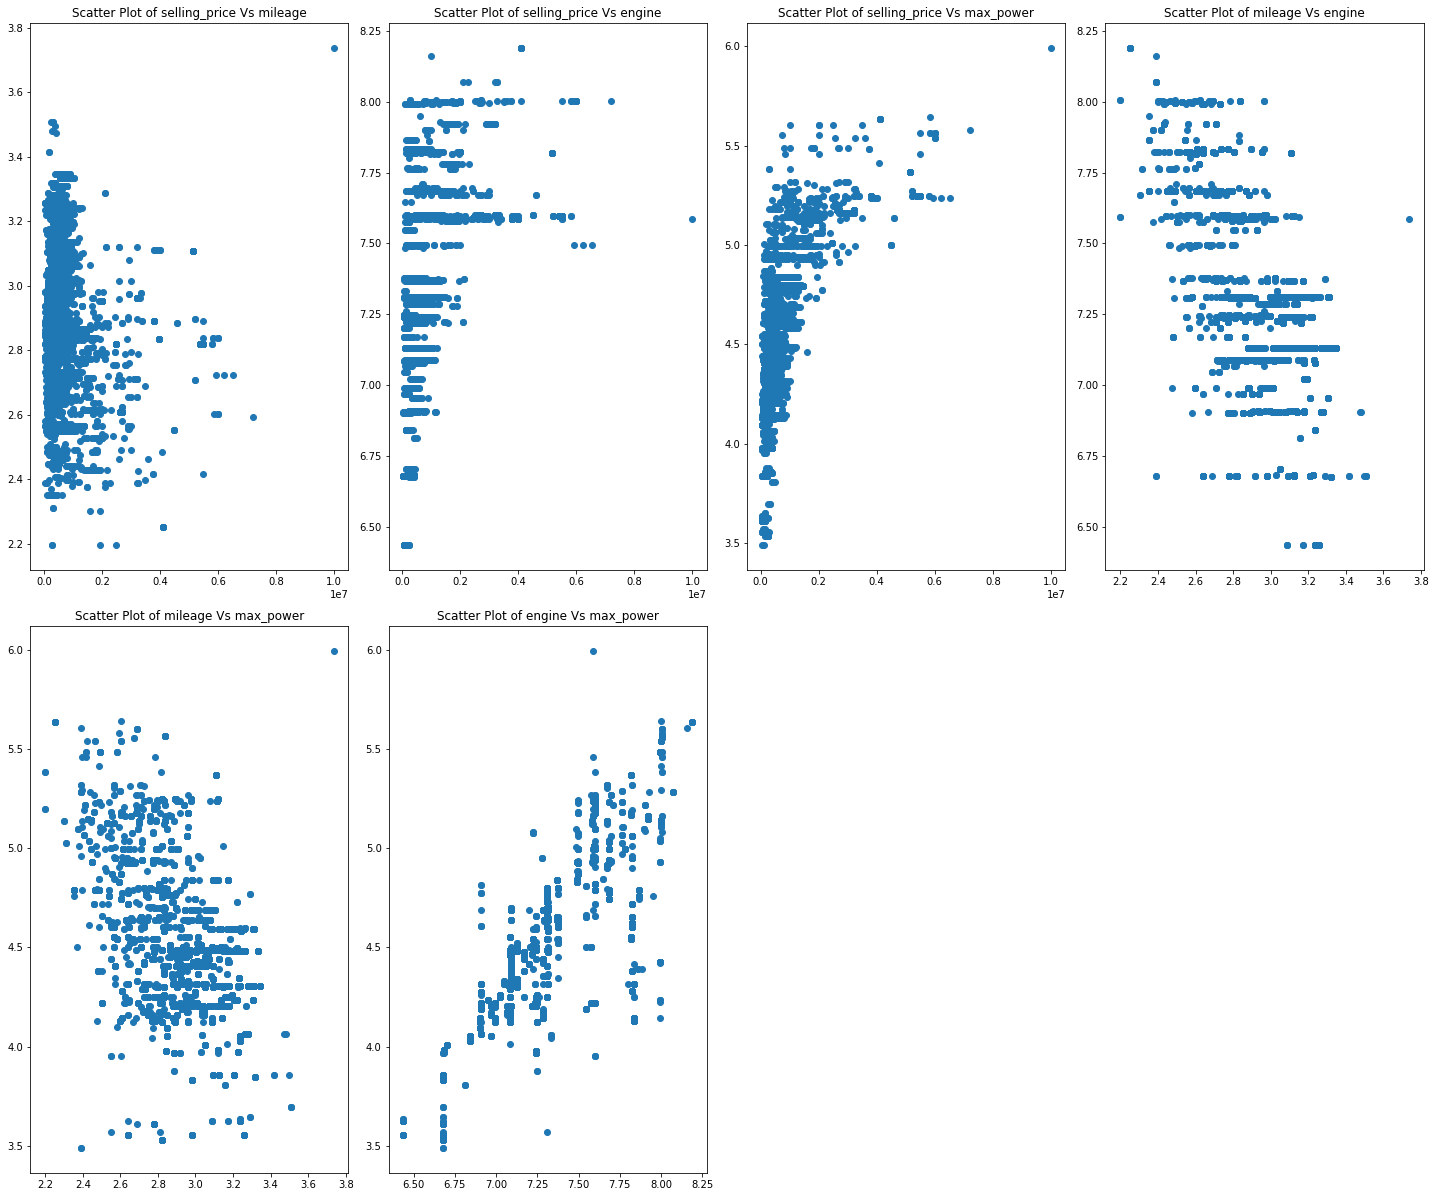

In [28]:
bi_con_list = list(itertools.combinations(usedcars_col_list,2))

fig = plt.figure(figsize=(20,50))
for i, col in enumerate(bi_con_list):
    plt.subplot(len(bi_con_list), 4, i+1)
    plt.scatter(log_usedcars_df[col[0]], log_usedcars_df[col[1]])
    plt.title("Scatter Plot of {} Vs {}".format(col[0],col[1]))
fig.tight_layout()
plt.show()

As per the above bivariate analysis scatter plots, the more positve relation was between selling_price, engine & max_power. which is expected. This can also be confirmed using the correlation coefficient matrix

### Appling Correlation Coefficient

In [29]:
usedcars_df.corr()

,year,selling_price,mileage,engine,max_power,seats
year,1.000000,0.412302,0.332116,0.018263,0.226598,-0.007923
selling_price,0.412302,1.000000,-0.128718,0.455682,0.749674,0.041617
mileage,0.332116,-0.128718,1.000000,-0.588134,-0.384507,-0.471882
engine,0.018263,0.455682,-0.588134,1.000000,0.703975,0.611103
max_power,0.226598,0.749674,-0.384507,0.703975,1.000000,0.191999
seats,-0.007923,0.041617,-0.471882,0.611103,0.191999,1.000000


### Correlation Coefficient - Matrices view

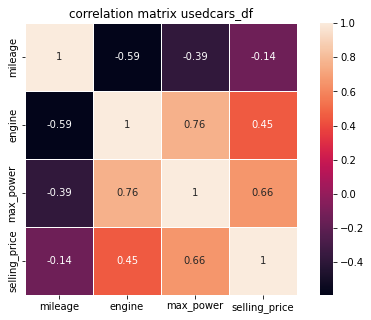

In [30]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(log_usedcars_df.corr(), square=True, annot=True, linewidths=.5)
plt.title('correlation matrix usedcars_df')

plt.show()

The most correlated variables with target variable is engine & max_power

### Bivariate analysis of a continuous-categorical pair


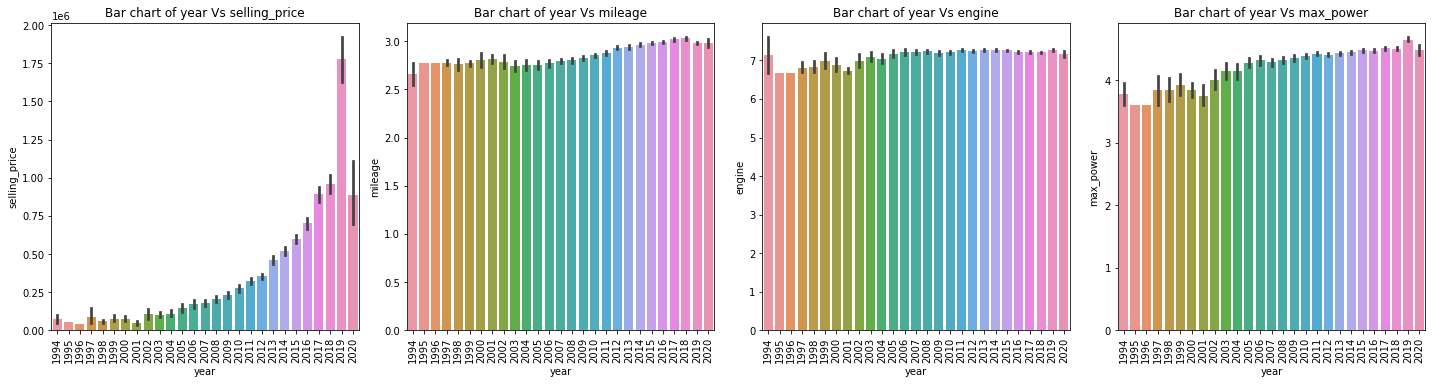

In [31]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    sns.barplot(usedcars_df["year"], log_usedcars_df[col])
    plt.title("Bar chart of year Vs {}".format(col))
    plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

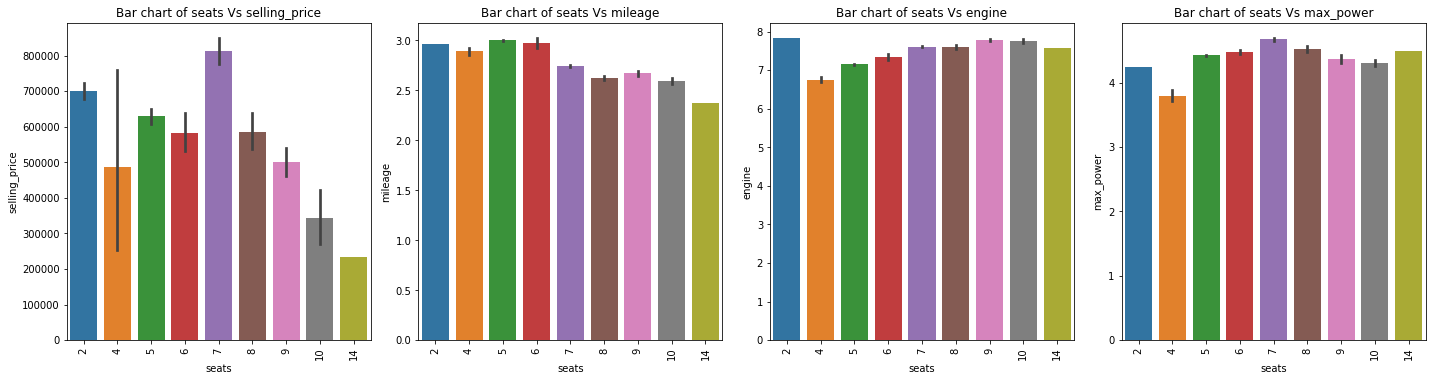

In [32]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    sns.barplot(usedcars_df["seats"], log_usedcars_df[col])
    plt.title("Bar chart of seats Vs {}".format(col))
    plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

As per the demonstrated Continuous-Categorical Variables the selling price varies significantly for few categorical type and for the others there isn't much difference. There is significant difference between selling prices and year & seats variables

In [33]:
# Test whether group differences are significant
for col in usedcars_cat_list:
    ft = usedcars_df[col].unique()
    grouped_fuel_df = usedcars_df.groupby(col)
    for var in ["selling_price"]:
        print("------------------------------------------------")
        print("Comparisons for variable: {} with {}".format(var,col))
        print("------------------------------------------------")
        for i in range(0, len(ft)):
            for j in range(i+1, len(ft)):
                print("t-test between groups {0} and {1}:".format(ft[i], ft[j]))
                print(stats.ttest_ind(
                    usedcars_df[usedcars_df[col]==ft[i]][var], 
                    usedcars_df[usedcars_df[col]==ft[j]][var]
                ))
    

------------------------------------------------
Comparisons for variable: selling_price with year
------------------------------------------------
t-test between groups 2014 and 2006:
Ttest_indResult(statistic=9.808810404237494, pvalue=2.1061988643437942e-21)
t-test between groups 2014 and 2010:
Ttest_indResult(statistic=12.132549786213138, pvalue=1.095087689424801e-31)
t-test between groups 2014 and 2007:
Ttest_indResult(statistic=12.38688667393929, pvalue=2.4706468374803807e-32)
t-test between groups 2014 and 2017:
Ttest_indResult(statistic=-10.444755005361504, pvalue=9.202211042739216e-25)
t-test between groups 2014 and 2001:
Ttest_indResult(statistic=3.2653521931303073, pvalue=0.001153116416162975)
t-test between groups 2014 and 2011:
Ttest_indResult(statistic=11.243440557425998, pvalue=6.073071763082287e-28)
t-test between groups 2014 and 2013:
Ttest_indResult(statistic=2.8329569822611522, pvalue=0.004683946134459236)
t-test between groups 2014 and 2005:
Ttest_indResult(statistic

The t-tests indicate that some differences are statistically significant and some are not.

### Bivariate analysis of two categorical variables


In [34]:
# Creating Categorical usedcar dataset
usedcars_cat_df = pd.DataFrame()
for col in usedcars_cat_list:
    usedcars_cat_df[col]=usedcars_df[col]

In [35]:
usedcars_cat_df

,year,seats
0,2014,5
1,2014,5
2,2006,5
3,2010,5
4,2007,5
...,...,...
7901,2013,5
7902,2007,5
7903,2009,5
7904,2013,5


Looks like the difference are visually and satistically significant.

### Feature Engineering

#### Working with categorical variables

In [36]:
dummy_usedcars_cat_df = pd.get_dummies(usedcars_cat_df, drop_first=True)

In [37]:
log_usedcars_df = pd.concat([log_usedcars_df, dummy_usedcars_cat_df], axis=1)

In [38]:
log_usedcars_df

,mileage,engine,max_power,selling_price,year,seats
0,3.152736,7.129298,4.304065,450000,2014,5
1,3.051167,7.311886,4.639765,370000,2014,5
2,2.873565,7.311218,4.356709,158000,2006,5
3,3.135494,7.241366,4.499810,225000,2010,5
4,2.778819,7.168580,4.479607,130000,2007,5
...,...,...,...,...,...,...
7901,2.917771,7.087574,4.417032,320000,2013,5
7902,2.821379,7.308543,4.700480,135000,2007,5
7903,2.960105,7.129298,4.302713,382000,2009,5
7904,3.159975,7.241366,4.248495,290000,2013,5


#### Dealing with Non Normality


selling_price
mileage
engine
max_power


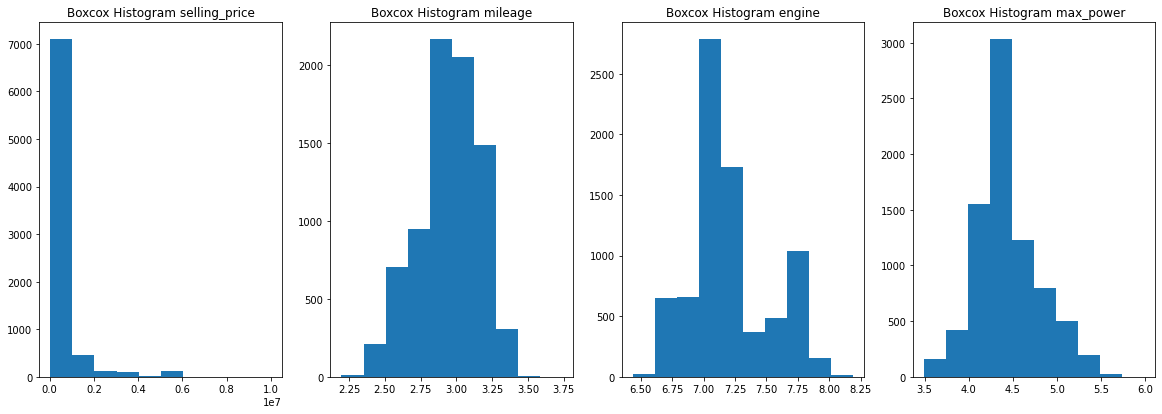

In [39]:
# Histograms of the log-transformed data
fig = plt.figure(figsize=(20,30))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    print(col)
    plt.hist(log_usedcars_df[col])
    plt.title("Boxcox Histogram {}".format(col))
    
plt.show()

In [40]:
# jarque_bera &  normaltest of the log-transformed data
fig = plt.figure(figsize=(20,30))
for col in usedcars_col_list:
    print(col)
    jb_stats = jarque_bera(log_usedcars_df[col])
    norm_stats = normaltest(log_usedcars_df[col])
    print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
    print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
    print("--------------------------")


selling_price
Jarque-Bera test statistics is 162830.687642466 and p value is 0.0
Normality test statistics is 6745.807948635 and p value is 0.0
--------------------------
mileage
Jarque-Bera test statistics is 256.4068503284236 and p value is 0.0
Normality test statistics is 238.57453459464395 and p value is 1.5638606479361165e-52
--------------------------
engine
Jarque-Bera test statistics is 238.54955689271415 and p value is 0.0
Normality test statistics is 223.45702814691595 and p value is 2.9986298967055847e-49
--------------------------
max_power
Jarque-Bera test statistics is 289.6577277883083 and p value is 0.0
Normality test statistics is 241.00216163688407 and p value is 4.6456398369651755e-53
--------------------------


<Figure size 1440x2160 with 0 Axes>

for few variables the p-values are 0, which indicates that the distribution of the log-transformed variables is statistically different from the normal distribution. However, these transformations might still be useful. 

#### Appying Boxcox Transformation

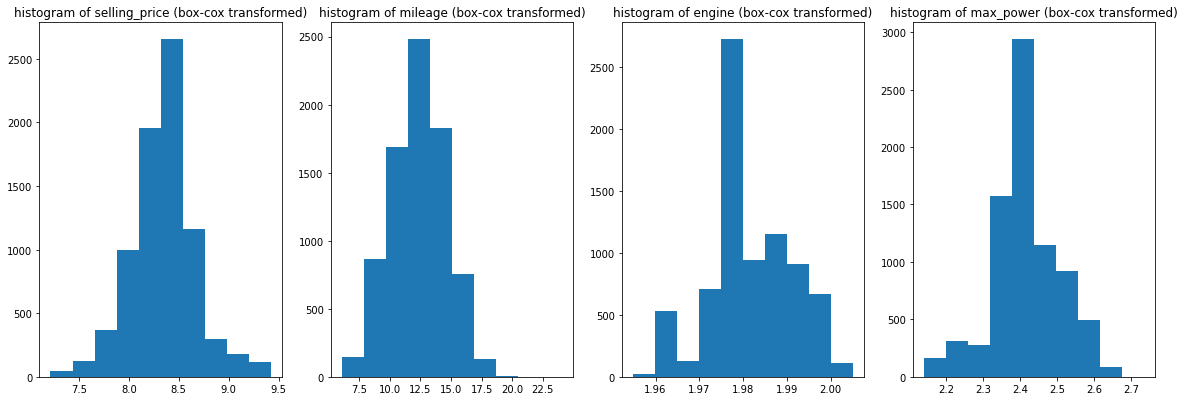

In [41]:
# Histograms of the boxcox transformed data

fig = plt.figure(figsize=(20,30))
for i, col in enumerate(usedcars_col_list):
    plt.subplot(len(usedcars_col_list), 4, i+1)
    col_boxcox,_ = boxcox(usedcars_df[col])
    plt.hist(col_boxcox)
    plt.title("histogram of {} (box-cox transformed)".format(col))
    
plt.show()


The result was similar to the log transformed data but with boxcox the selling prices is now close to normal distribution. Not all are statisically normal distribution.

### PCA - Principal Component Analysis


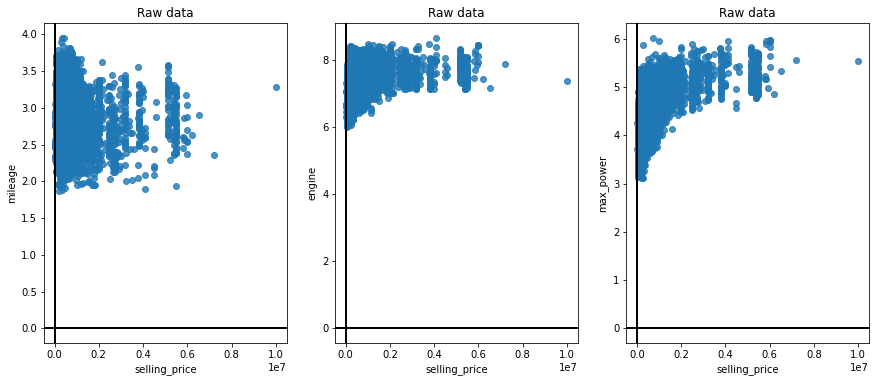

In [42]:
pca_list = ['mileage', 'engine', 'max_power']
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(pca_list):
    plt.subplot(len(pca_list), 4, i+1)
    t = sns.regplot(
        'selling_price',
        col,
        log_usedcars_df,
        x_jitter=.49,
        y_jitter=.49,
        fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title('Raw data')
plt.show()




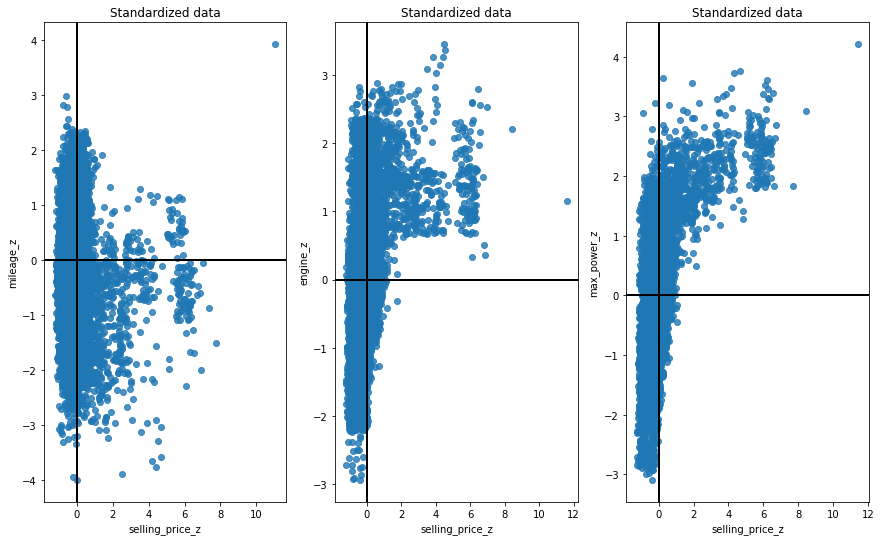

In [43]:
# Standardize the variables by subtracting the mean and dividing by the standard
# deviation, so that both variables are on the same scale.
pca_list_z = [  'mileage_z', 'engine_z', 'max_power_z']
log_usedcars_st_df = pd.DataFrame()
log_usedcars_st_df['selling_price_z'] = (log_usedcars_df['selling_price'] - log_usedcars_df['selling_price'].mean()) / log_usedcars_df['selling_price'].std()
for col in pca_list:
    log_usedcars_st_df[col] = (log_usedcars_df[col] - log_usedcars_df[col].mean()) / log_usedcars_df[col].std()

log_usedcars_st_df.rename(columns={'mileage':'mileage_z', 'engine':'engine_z', 'max_power':'max_power_z'}, inplace=True)
fig = plt.figure(figsize=(20,30))
for i, col in enumerate(pca_list_z):
    plt.subplot(len(pca_list_z), 4, i+1)
    t = sns.regplot(
        'selling_price_z',
        col,
        log_usedcars_st_df,
        x_jitter=.49,
        y_jitter=.49,
        fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title('Standardized data')
plt.show()

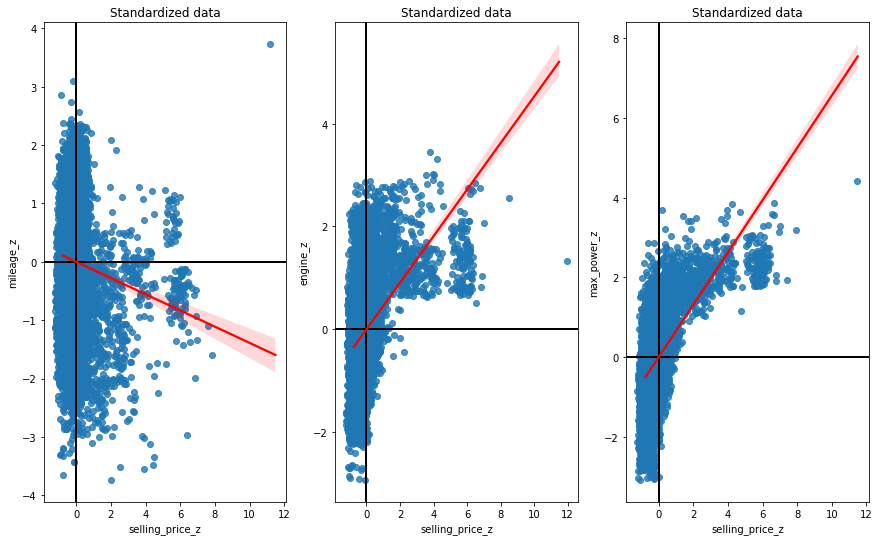

In [44]:


fig = plt.figure(figsize=(20,30))
for i, col in enumerate(pca_list_z):
    plt.subplot(len(pca_list_z), 4, i+1)
    t = sns.regplot(
        'selling_price_z',
        col,
        log_usedcars_st_df,
        x_jitter=.49,
        y_jitter=.49,
        fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title('Standardized data')
    
    sns.regplot('selling_price_z', 
            col, 
            log_usedcars_st_df, 
            scatter=False, 
            color="red")
    
plt.show()

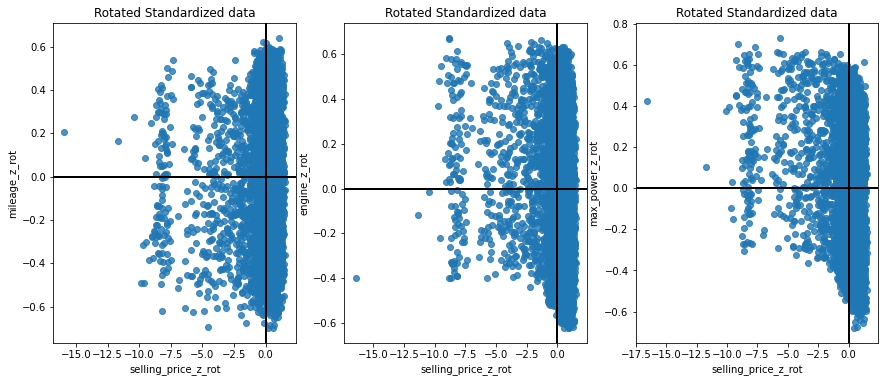

In [45]:
# Rotating the data so that the axes roughly match to the vector above
pca_list_z_rot = ['mileage_z_rot', 'engine_z_rot', 'max_power_z_rot']

log_usedcars_st_rt_df = pd.DataFrame()
log_usedcars_st_rt_df['selling_price_z_rot'] = math.cos(40) * log_usedcars_st_df['selling_price_z'] - math.sin(40) * log_usedcars_st_df['selling_price_z']
for col in pca_list_z:
    log_usedcars_st_rt_df[col] = math.sin(40) * log_usedcars_st_df[col] + math.cos(40) * log_usedcars_st_df[col]

log_usedcars_st_rt_df.rename(columns={ 'mileage_z':'mileage_z_rot', 'engine_z':'engine_z_rot', 'max_power_z':'max_power_z_rot'}, inplace=True)

fig = plt.figure(figsize=(20,20))
for i, col in enumerate(pca_list_z_rot):
    plt.subplot(len(pca_list_z_rot), 4, i+1)
    t = sns.regplot(
        'selling_price_z_rot',
        col,
        log_usedcars_st_rt_df,
        x_jitter=.49,
        y_jitter=.49,
        fit_reg=False
    )
    t.axhline(0, color='k', linestyle='-', linewidth=2)
    t.axvline(0, color='k', linestyle='-', linewidth=2)
    t.axes.set_title('Rotated Standardized data')
plt.show()






Based on the PCA (Principal component analysis) the Variance on horizontal vectors span is higher than vertical vector, which means dropping horizontal axis we would lose less than 50% of the information. 

#### Calculating Eigenvalues and Eigenvectors


In [46]:


X = StandardScaler().fit_transform(log_usedcars_df)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns. So transpose `X`.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Calculating eigenvalues and eigenvectors
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The proportion of total variance in the dataset explained by each',
    'component calculated by hand\n',
    eig_val_cov / sum(eig_val_cov)
)



Covariance Matrix:
 [[ 1.0001265  -0.59145398 -0.38536443 -0.13893174  0.32917071 -0.50619601]
 [-0.59145398  1.0001265   0.76167184  0.45250498  0.0496074   0.57391703]
 [-0.38536443  0.76167184  1.0001265   0.65632217  0.26506253  0.22470492]
 [-0.13893174  0.45250498  0.65632217  1.0001265   0.41235372  0.04162196]
 [ 0.32917071  0.0496074   0.26506253  0.41235372  1.0001265  -0.00792403]
 [-0.50619601  0.57391703  0.22470492  0.04162196 -0.00792403  1.0001265 ]]
Eigenvector 1: 
[ 0.39523682 -0.55023199 -0.50948777 -0.38149992 -0.10246929 -0.35413652]
Eigenvalue 1: 2.8226045200466556
----------------------------------------
Eigenvector 2: 
[-0.45719541  0.09308757 -0.22698628 -0.45881952 -0.63143751  0.34864826]
Eigenvalue 2: 1.6304370081090183
----------------------------------------
Eigenvector 3: 
[-0.18795603 -0.01138935  0.26504859  0.27832431 -0.55636727 -0.71223809]
Eigenvalue 3: 0.7696462014883227
----------------------------------------
Eigenvector 4: 
[-0.48061317 -0.42922

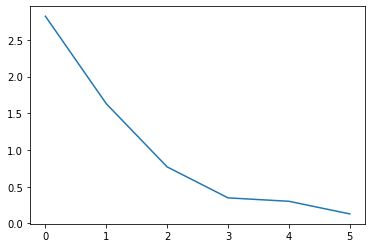

[2.82260452 1.63043701 0.7696462  0.34783483 0.30114267 0.12909378]


In [47]:
# Print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

Both the scree plot and the eigenvalues-greater-than-1 rule agree that you should keep 2 components.

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.47037458 0.27170513]


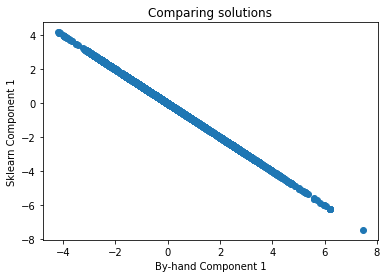

In [48]:
# Scikit-learn PCA function

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform `X` into `Y`.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the scikit-learn solution to yours—it's a perfect match!
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

#### Summary

As per the PCA Analysis the principal components are 6 out of 8 variables. 
They are selling_price, km_driven, mileage, fuel, seller_type, transmission & owner 

In [49]:
# Checking Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["features"]=log_usedcars_df.columns
vif_data["VIF"]=[variance_inflation_factor(log_usedcars_df.values, i)
                          for i in range(len(log_usedcars_df.columns))]
vif_data

,features,VIF
0,mileage,346.681110
1,engine,2218.228988
2,max_power,596.976638
3,selling_price,2.936440
4,year,2057.602437
5,seats,61.524561


#### Create Training and Testing Data sets

In [50]:
# Split Scaled log transformed df_data into Test and Train data
X = log_usedcars_df.drop(['selling_price'],axis=1)
y = log_usedcars_df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=465)

## Modeling

#### OLS Regression

In [51]:
X_train = sm.add_constant(X_train)

# Fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# Print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1292.
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:35:11   Log-Likelihood:                -92798.
No. Observations:                6324   AIC:                         1.856e+05
Df Residuals:                    6318   BIC:                         1.856e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.224e+08   4.46e+06    -27.440      0.0

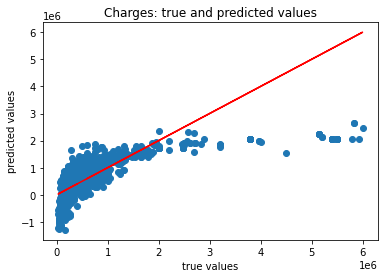

In [52]:
# Add a constant to the model because it's best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# You are making predictions here
ols_y_preds = results.predict(X_test)

plt.scatter(y_test, ols_y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

#### Linear Regression


In [53]:

lr = LinearRegression()
lr.fit(X_train, y_train)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# You are making predictions here
y_preds_train = lr.predict(X_train)
y_preds_test = lr.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

The number of observations in training set is 6324
The number of observations in test set is 1582
R-squared of the model in the training set is: 0.5056514837179752
-----Test set statistics-----
R-squared of the model in the test set is: 0.5010521922407017
Mean absolute error of the prediction is: 333819.09781244426
Mean squared error of the prediction is: 335100549101.805
Root mean squared error of the prediction is: 578878.6998169867
Mean absolute percentage error of the prediction is: 97.24736094187651
Cross Validation Score is: 0.5031154416143269


#### Ridge Regression


In [54]:
# Creating regularization parameter
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# Fitting a ridge regression model. Here, `alpha` is the regularization
# parameter (usually called `lambda`). As `alpha` gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = RidgeCV(alphas=alphas, cv=5) 
ridgeregr.fit(X_train, y_train)

# You are making predictions here
ridge_y_preds_train = ridgeregr.predict(X_train)
ridge_y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, ridge_y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, ridge_y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, ridge_y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - ridge_y_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = ridgeregr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

R-squared of the model on the training set is: 0.5056506279123907
-----Test set statistics-----
R-squared of the model on the test set is: 0.5010618106785473
Mean absolute error of the prediction is: 333656.6122499046
Mean squared error of the prediction is: 335094089220.12317
Root mean squared error of the prediction is: 578873.1201395718
Mean absolute percentage error of the prediction is: 97.17539280086078
Cross Validation Score is: 0.5031269021391495


#### Lasso Regression


In [55]:
lassoregr = LassoCV(alphas=alphas, cv=5) 
lassoregr.fit(X_train, y_train)

# You are making predictions here
lasso_y_preds_train = lassoregr.predict(X_train)
lasso_y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, lasso_y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, lasso_y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, lasso_y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - lasso_y_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = lassoregr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

R-squared of the model on the training set is: 0.5056514837179737
-----Test set statistics-----
R-squared of the model on the test set is: 0.5010521922406975
Mean absolute error of the prediction is: 333819.0978124282
Mean squared error of the prediction is: 335100549101.80786
Root mean squared error of the prediction is: 578878.6998169891
Mean absolute percentage error of the prediction is: 97.24736094187153
Cross Validation Score is: 0.5031226762333397


#### ElasticNet Regression


In [56]:
elasticregr = ElasticNetCV(alphas=alphas, cv=5) 
elasticregr.fit(X_train, y_train)

# You are making predictions here
y_preds_train = elasticregr.predict(X_train)
elasticy_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, elasticy_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, elasticy_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, elasticy_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - elasticy_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = elasticregr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

R-squared of the model on the training set is: 0.5056431639395109
-----Test set statistics-----
R-squared of the model on the test set is: 0.5010769846833516
Mean absolute error of the prediction is: 333314.89219964825
Mean squared error of the prediction is: 335083898139.4872
Root mean squared error of the prediction is: 578864.3175559253
Mean absolute percentage error of the prediction is: 97.0214517349378
Cross Validation Score is: 0.5031391258705902


#### KNN Regressor

In [57]:

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

# You are making predictions here
knn_y_preds_train = knn.predict(X_train)
knn_y_preds_test = knn.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, elasticy_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, elasticy_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, elasticy_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - elasticy_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))


R-squared of the model on the training set is: 0.5056431639395109
-----Test set statistics-----
R-squared of the model on the test set is: 0.5010769846833516
Mean absolute error of the prediction is: 333314.89219964825
Mean squared error of the prediction is: 335083898139.4872
Root mean squared error of the prediction is: 578864.3175559253
Mean absolute percentage error of the prediction is: 97.0214517349378
Cross Validation Score is: 0.9051729151650534


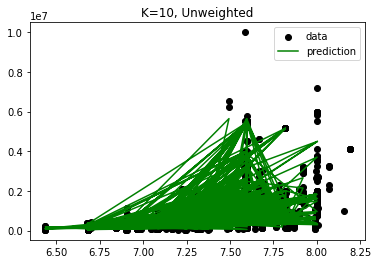

In [58]:
# Plotting the training data and the prediction line for the newly generated loudness values
plt.scatter(X_train['engine'], y_train, c='k', label='data')
plt.plot(X_test['engine'], knn_y_preds_test, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

#### Decision Tree Regressor

In [59]:
decisiontreeregr = DecisionTreeRegressor() 
decisiontreeregr.fit(X_train, y_train)

# You are making predictions here
deci_y_preds_train = decisiontreeregr.predict(X_train)
deci_y_preds_test = decisiontreeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(decisiontreeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(decisiontreeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, deci_y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, deci_y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, deci_y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - deci_y_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = decisiontreeregr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

R-squared of the model on the training set is: 0.9940923918902153
-----Test set statistics-----
R-squared of the model on the test set is: 0.9751763449023895
Mean absolute error of the prediction is: 71020.16230613574
Mean squared error of the prediction is: 16671925048.192745
Root mean squared error of the prediction is: 129119.8088915591
Mean absolute percentage error of the prediction is: 15.08279858954769
Cross Validation Score is: 0.9393455269328068


#### Random Forest Regressor

In [60]:
randomregr = RandomForestRegressor() 
randomregr.fit(X_train, y_train)

# You are making predictions here
random_y_preds_train = randomregr.predict(X_train)
random_y_preds_test = randomregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(randomregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(randomregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, random_y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, random_y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, random_y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - random_y_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = randomregr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

R-squared of the model on the training set is: 0.9905819745740035
-----Test set statistics-----
R-squared of the model on the test set is: 0.9817783646997388
Mean absolute error of the prediction is: 66444.17025145375
Mean squared error of the prediction is: 12237913264.058386
Root mean squared error of the prediction is: 110625.10232338042
Mean absolute percentage error of the prediction is: 14.350596187427152
Cross Validation Score is: 0.9614069402629308


#### Random Forest Regressor with Hyperparameter Tuning


In [61]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
randomregr = RandomForestRegressor(n_estimators=200,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  max_features='sqrt',
                                  max_depth=60,
                                  bootstrap=False) 
randomregr.fit(X_train, y_train)

# You are making predictions here
randomh_y_preds_train = randomregr.predict(X_train)
randomh_y_preds_test = randomregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(randomregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(randomregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, randomh_y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, randomh_y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, randomh_y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - randomh_y_preds_test) / y_test)) * 100))

# k-Fold Cross Validation
cv_score = cross_val_score(estimator = randomregr, X = X_train, y = y_train, cv = 5)
print("Cross Validation Score is: {}".format(cv_score.mean()))

R-squared of the model on the training set is: 0.992771850569675
-----Test set statistics-----
R-squared of the model on the test set is: 0.981336341217256
Mean absolute error of the prediction is: 66157.11952444325
Mean squared error of the prediction is: 12534782614.704607
Root mean squared error of the prediction is: 111958.8433966009
Mean absolute percentage error of the prediction is: 14.189859921655918
Cross Validation Score is: 0.9613544602117339


#### Compare Predicted Values of each Model

In [63]:
compare = pd.DataFrame()
compare['selling_price'] = y_test
compare['ols_y_preds'] = ols_y_preds
compare['lr_preds_test'] = y_preds_test
compare['ridge_y_preds_test'] = ridge_y_preds_test
compare['lasso_y_preds_test'] = lasso_y_preds_test
compare['elastic_y_preds_test'] = elasticy_preds_test
compare['knn_y_preds_test'] = knn_y_preds_test
compare['deci_y_preds_test'] = deci_y_preds_test
compare['random_y_preds_test'] = random_y_preds_test
compare['randomh_y_preds_test'] = randomh_y_preds_test

In [64]:
compare

,selling_price,ols_y_preds,lr_preds_test,ridge_y_preds_test,lasso_y_preds_test,elastic_y_preds_test,knn_y_preds_test,deci_y_preds_test,random_y_preds_test,randomh_y_preds_test
4047,400000,4.095648e+05,4.095648e+05,4.098198e+05,4.095648e+05,4.103582e+05,403499.9,396590.772727,395030.912138,396590.772727
90,175000,3.641002e+04,3.641002e+04,3.605379e+04,3.641002e+04,3.532093e+04,186000.0,160000.000000,156410.236419,157121.490083
3633,149000,5.259618e+05,5.259618e+05,5.253759e+05,5.259618e+05,5.241391e+05,274200.0,295000.000000,285876.839048,292102.083333
7830,599000,1.285307e+06,1.285307e+06,1.284551e+06,1.285307e+06,1.282941e+06,818400.0,770500.000000,832638.465368,753710.000000
5529,165000,-1.271359e+05,-1.271359e+05,-1.271530e+05,-1.271359e+05,-1.271786e+05,117500.0,116250.000000,115566.527778,116243.750000
...,...,...,...,...,...,...,...,...,...,...
4897,600000,1.198634e+06,1.198634e+06,1.197753e+06,1.198634e+06,1.195899e+06,711500.0,718833.333333,720367.939336,718833.333333
4377,350000,2.208149e+05,2.208149e+05,2.214151e+05,2.208149e+05,2.227233e+05,326900.0,336666.666667,335396.616855,336666.666667
116,1140000,1.317476e+06,1.317476e+06,1.316698e+06,1.317476e+06,1.315038e+06,939499.8,935908.909091,936592.524128,935908.909091
1031,440000,1.436496e+06,1.436496e+06,1.435670e+06,1.436496e+06,1.433868e+06,393700.0,435000.000000,418178.809524,442393.333333


### Summary:
Among all the Random Forest Regressor has the highest R-Squared Value which makes it the best.